<a href="https://colab.research.google.com/github/tankTopTaro/Deep-Learning-with-Python/blob/main/04_Transfer_Learning_Part_1_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning with Tensorflow: Feature Extraction
**Transfer learning** takes patterns (also called **weights**) another model has learned from another problem and using them for our own problem.

> Transfer Learning use cases:

> * Computer vision (ImageNet)
* Natural language processing 

> Benefits of using transfer learning:
> * Can leverage an existing neural network architecture proven to work on problems similar to our own
* Can leverage a working network architecture which has already learned pattern on similar data to our own (often results in great result with less data)


In [1]:
!nvidia-smi

Sat Sep 24 20:36:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Download and become one with the data

In [2]:
# Get data (10% of 10_food_classes from Food101)
import zipfile

# Download the file
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the file
zip_r = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_r.extractall()
zip_r.close()

--2022-09-24 20:36:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 108.177.120.128, 142.250.159.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   170MB/s    in 0.9s    

2022-09-24 20:36:54 (170 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
# How many images in each folder
import os

# Walkthrough the data directory and list number of files
for dirpath, dirnames, filenames in os.walk('10_food_classes_10_percent'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_10_percent'
There are 10 directories and 0 images in '10_food_classes_10_percent/train'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_ric

## Preparing the data

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

In [5]:
# Load data using Kera utility
IMG_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

print("Training images: ")
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SHAPE),
    batch_size=BATCH_SIZE
)

print("Testing images")
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SHAPE),
    batch_size=BATCH_SIZE
)

Training images: 
Found 750 files belonging to 10 classes.
Testing images
Found 2500 files belonging to 10 classes.


In [6]:
# Get the class names
class_names = train_data.class_names
print(class_names)

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


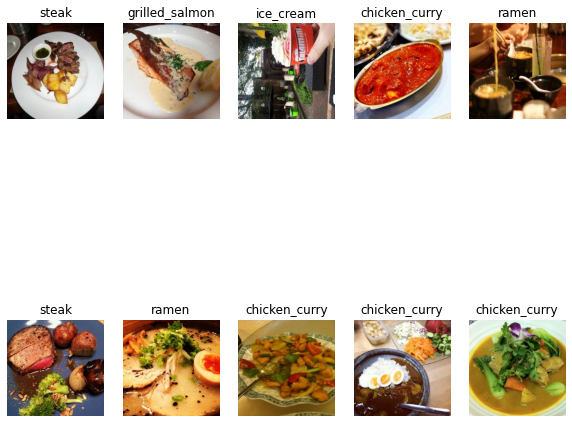

In [7]:
# Visualize the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [8]:
# Standardize the data
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y)) # where x-images, y-labels.
test_data = test_data.map(lambda x, y: (normalization_layer(x), y)) # where x-images, y-labels.

In [9]:
# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)

(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)
(14, 224, 224, 3)
(14,)


## Setting up callbacks

Callbacks are extra functionality you can add to your models to be performed during or after training. Some of the most popular callbacks:
* Tracking experiments with `TensorBoard` callback
* Model checkpoint with the `ModelCheckpoint` callback
* Stopping a model from training (before it trains too long and overfits) with the `EarlyStopping` callback

In [11]:
# Create a TensorBoard callback function
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## Creating models using [TensorFlow Hub](https://tfhub.dev/)

In [12]:
# Let's compare the following two models
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

In [13]:
# Import dependencies
import tensorflow as tf
import tensorflow_hub as hub
from keras import layers

In [14]:
# Make a create_model() function to create a model from a URL
def create_model(model_url, num_classes=10):
  """
  Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFLow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor
      layer and Dense output layer with num_classes output neurons.
  """
  # Download the pretrained model and saved it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,   # freeze the already learned patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMG_SHAPE+(3,)) 
  
  # Create our own model
  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation='softmax', name='output_layer')
  ])

  return model

### Creating and testing ResNet TensorFlow Hub Feature Extraction model

In [15]:
# Create Resnet model
num_classes = len(class_names)

resnet_model = create_model(resnet_url,
                           num_classes=num_classes)

In [16]:
# Compile the Resnet model
resnet_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [17]:
# Fit the model
resnet_history = resnet_model.fit(train_data, epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub', 
                                                                         experiment_name='resnet50V2')])

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20220924-203712
Epoch 1/5
24/24 [==============================] - 28s 575ms/step - loss: 1.9710 - accuracy: 0.3413 - val_loss: 1.1832 - val_accuracy: 0.6324
Epoch 2/5
24/24 [==============================] - 8s 341ms/step - loss: 0.9390 - accuracy: 0.7280 - val_loss: 0.8625 - val_accuracy: 0.7264
Epoch 3/5
24/24 [==============================] - 8s 343ms/step - loss: 0.6541 - accuracy: 0.8107 - val_loss: 0.7395 - val_accuracy: 0.7636
Epoch 4/5
24/24 [==============================] - 8s 347ms/step - loss: 0.4826 - accuracy: 0.8827 - val_loss: 0.6863 - val_accuracy: 0.7796
Epoch 5/5
24/24 [==============================] - 8s 345ms/step - loss: 0.3782 - accuracy: 0.9160 - val_loss: 0.6605 - val_accuracy: 0.7876


In [18]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [20]:
# Create a function to plot loss curves
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow History object.

  Returns:
    Plots of training/validation loss and accuracy metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

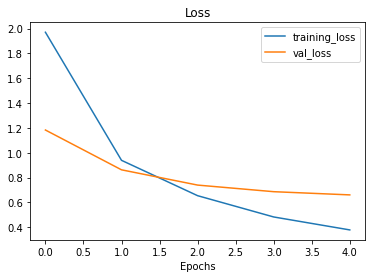

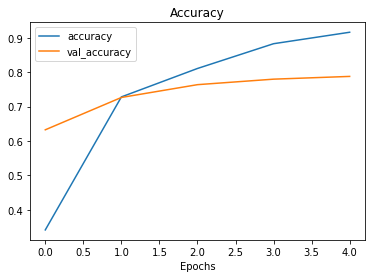

In [21]:
plot_loss_curves(resnet_history)

### Creating and testing EfficientNetB0 TensorFlow Hub Feature Extraction model

In [22]:
# Create EfficientNetB0 feature extraction model
num_classes = len(class_names)

efficientnet_model = create_model(efficientnet_url, 
                                  num_classes=num_classes)

In [25]:
# Compile the model
efficientnet_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                            optimizer=tf.keras.optimizers.Adam(),
                            metrics=['accuracy'])

# Fit the model
efficientnet_history = efficientnet_model.fit(train_data, epochs=5,
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',
                                                                                     experiment_name='efficientnetb0')])

Saving TensorBoard log files to: tensorflow_hub/efficientnetb0/20220924-210222
Epoch 1/5
24/24 [==============================] - 10s 286ms/step - loss: 0.4555 - accuracy: 0.8960 - val_loss: 0.4988 - val_accuracy: 0.8648
Epoch 2/5
24/24 [==============================] - 6s 244ms/step - loss: 0.3585 - accuracy: 0.9293 - val_loss: 0.4639 - val_accuracy: 0.8732
Epoch 3/5
24/24 [==============================] - 6s 247ms/step - loss: 0.3039 - accuracy: 0.9413 - val_loss: 0.4415 - val_accuracy: 0.8764
Epoch 4/5
24/24 [==============================] - 6s 246ms/step - loss: 0.2631 - accuracy: 0.9547 - val_loss: 0.4261 - val_accuracy: 0.8788
Epoch 5/5
24/24 [==============================] - 6s 247ms/step - loss: 0.2306 - accuracy: 0.9640 - val_loss: 0.4143 - val_accuracy: 0.8804


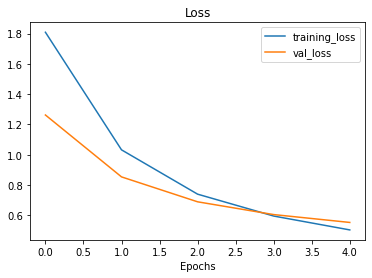

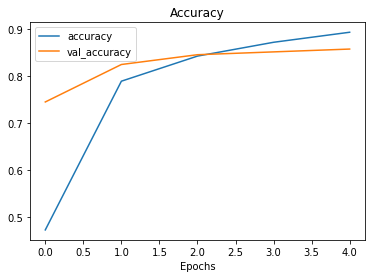

In [24]:
# Plot loss curves
plot_loss_curves(efficientnet_history)

In [26]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [27]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [28]:
# How many layers do efficientnetb0 and resnet have
print(f"efficientnet_model layers: {len(efficientnet_model.layers[0].weights)}")
print(f"resnet_model layers: {len(resnet_model.layers[0].weights)}")

efficientnet_model layers: 309
resnet_model layers: 270


## Different types of transfer learning

* **"As is"** transfer learning — using an existing model with no changes what so ever (e.g. using ImageNet model on 1000 ImageNet classes, none of your own)
* **"Feature extraction"** transfer learning — use the prelearned patterns of an existing model (e.g. EfficientNetB0 trained on ImageNet) and adjust the output layer for your own problem (e.g. 1000 classes -> 10 classes)
* **"Fine-tuning"** transfer learning — use the prrelearned patterns of an existing model and "fine-tune" many or all of the underlying layers (including new output layers)

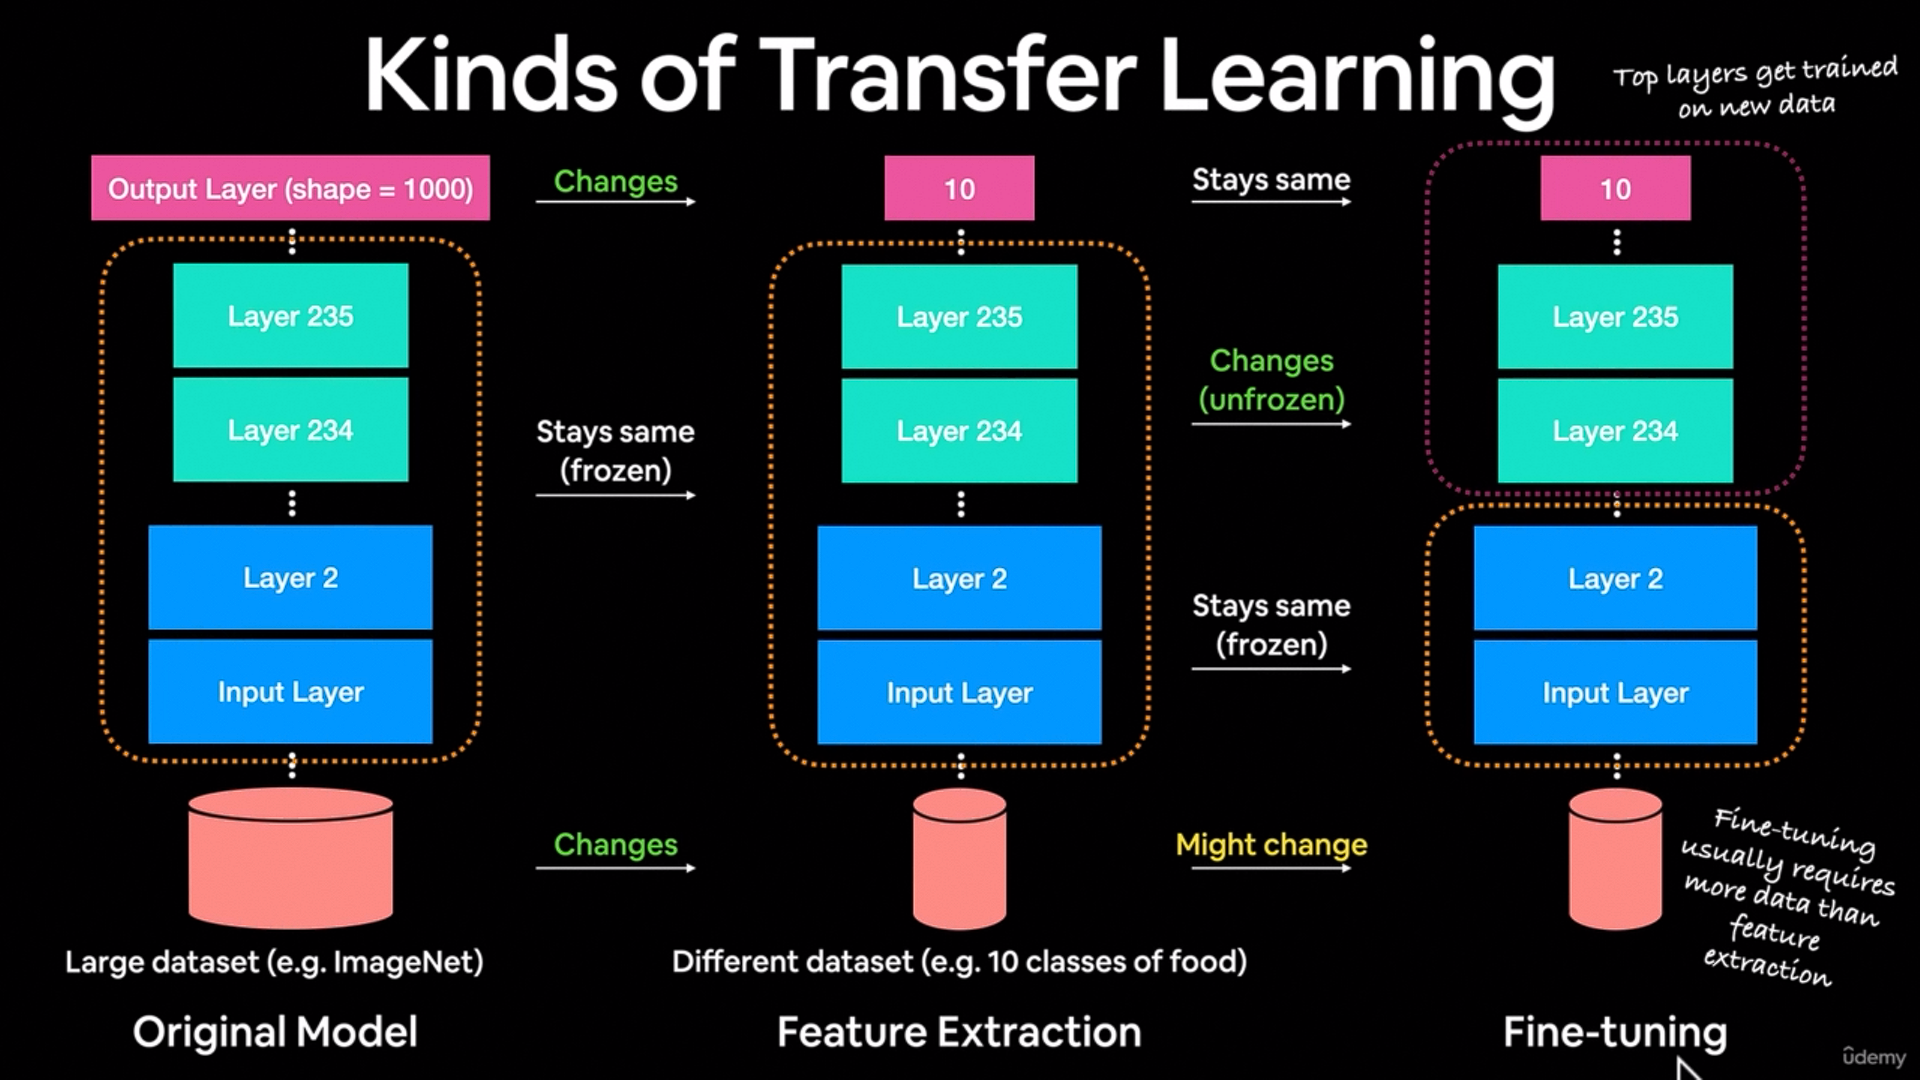

## Comparing model results using TensorBoard

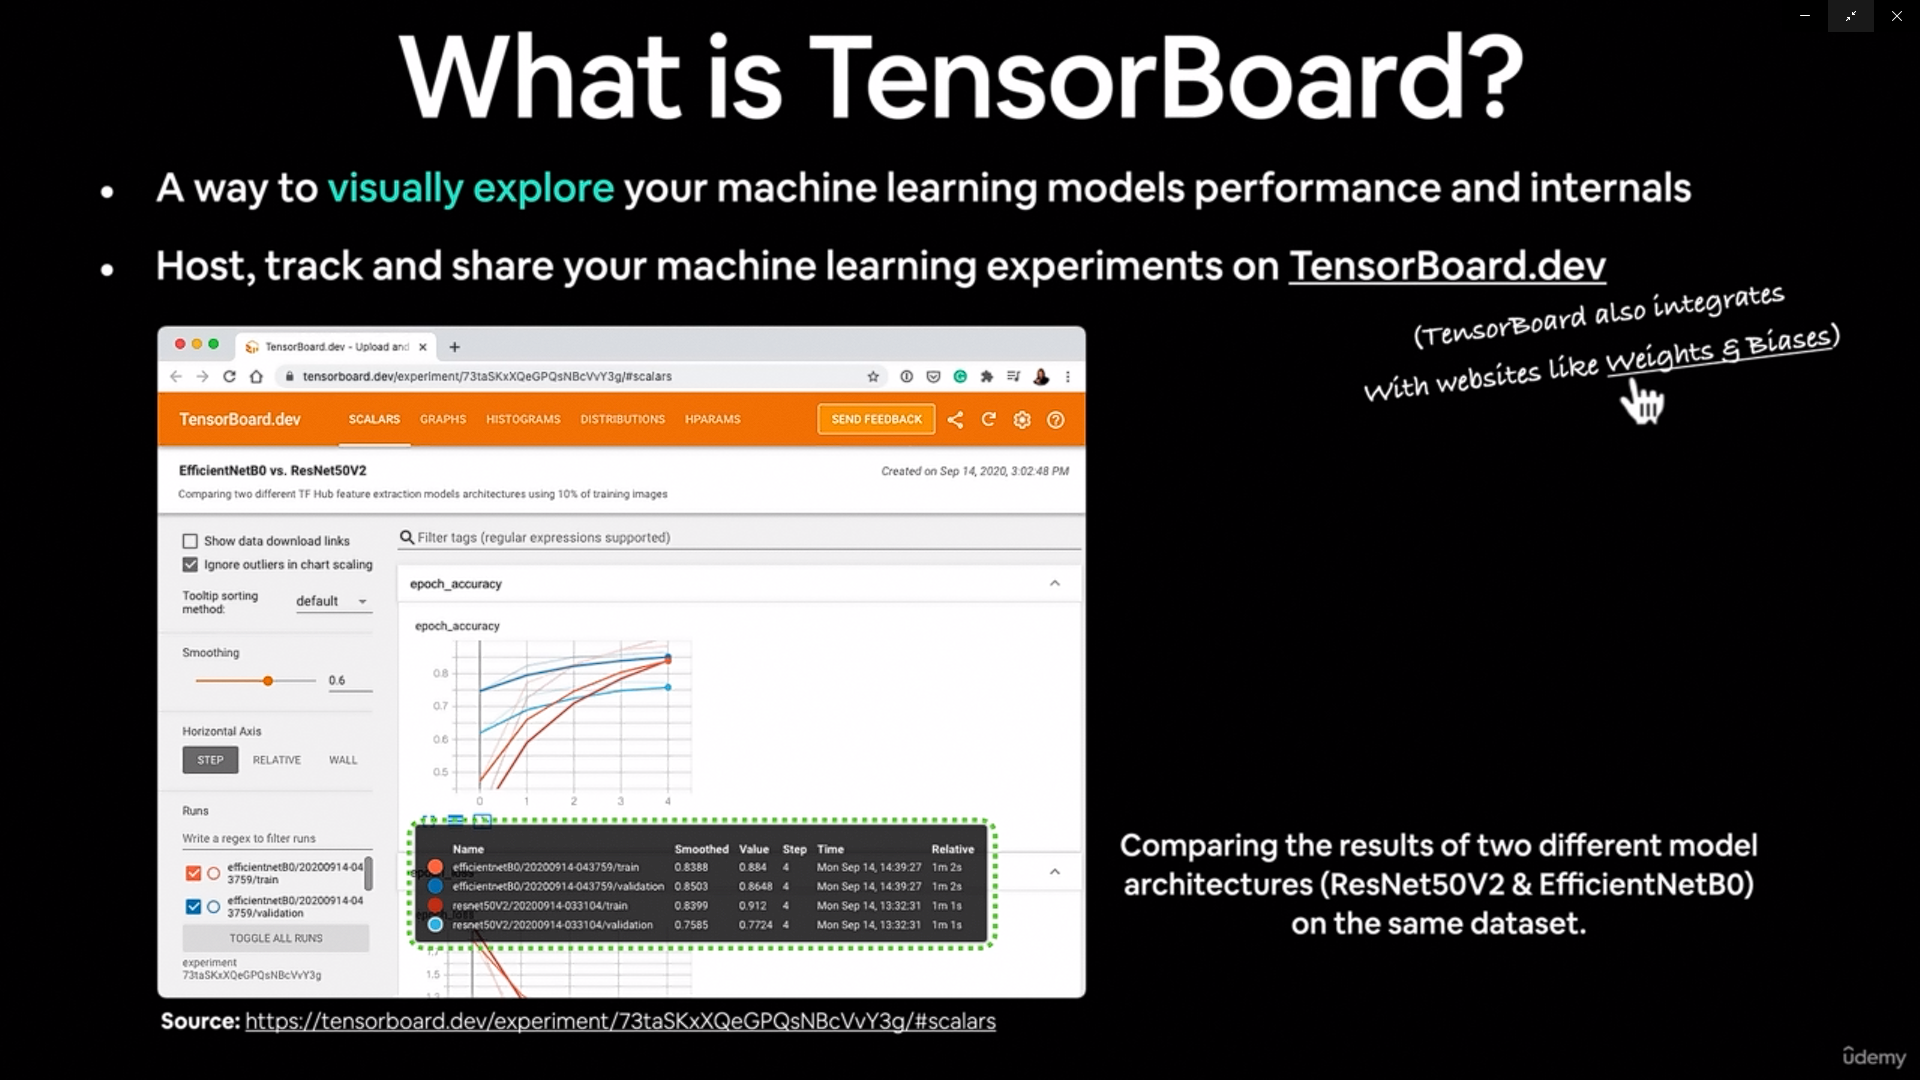

In [29]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name 'EfficientNetB0 vs. ResNet50V2' \
  --description 'Comparing two different TF Hub feature extraction model architecture using 10% of the training data.' \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=h3ERfIjuQ1VadPR7xgUsHvxWDj8mUX&prompt=consent&access_type=off

TensorBoard experiments: https://tensorboard.dev/experiment/0vcbZe1QR1eF38Aefknt0w/

In [30]:
# Check out waht TensorBoard experiments you have
!tensorboard dev list

https://tensorboard.dev/experiment/0vcbZe1QR1eF38Aefknt0w/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Comparing two different TF Hub feature extraction model architecture using 10% of the training data.
	Id                   0vcbZe1QR1eF38Aefknt0w
	Created              2022-09-24 21:34:56 (4 minutes ago)
	Updated              2022-09-24 21:34:59 (4 minutes ago)
	Runs                 6
	Tags                 5
	Scalars              90
	Tensor bytes         0
	Binary object bytes  9855026
Total: 1 experiment(s)


In [ ]:
# Delete an experiment
# !tensorboard dev delete --experiment_id 0vcbZe1QR1eF38Aefknt0w

⚒ **Challenge:** Create a binary image classification dataset (with 10 images of any two classes, e.g. car vs. truck) and use a pre-trained TensorFlow Hub image classification model to classify them. How does it go?